# Basic plotting

Visualizing data and plotting functions are essential tasks. First we need to import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In order to plot a function, you need a paired list of data. One way to do this is to create an array of values of the independent variable. You can then pass this array to the function you wish to plot

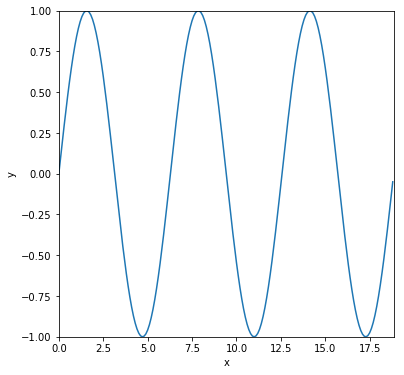

In [2]:
x=np.arange(0,6*np.pi, 0.1)  #define the array of x-values
y=np.sin(x)                  #define the function, for instance a sine
plt.figure(figsize=(6,6))    #create a figure object
plt.plot(x,y)                #plot the function
plt.xlabel('x')              #label the x-axis
plt.ylabel('y')              #label the y-axis
plt.axis([0,6*np.pi,-1,1]);   #set the x and y limits

# Assignment 1: 
In first year E&M you derived the electric potential of a charged spherical shell. If you forgot the answer, you can find it in Griffiths example 2.7. Plot this potential as a function of distance $r$ from the centre of the spherical shell of radius $R=10cm$ that carries a total charge $Q= 1\,\mu C$ for $0<r<50\,cm$. Make sure to label the axes of the graph and indicate appropriate units.


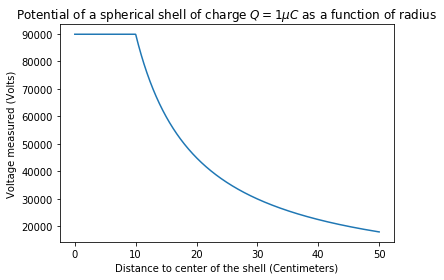

In [3]:
e=8.854*10**(-12)                      #define the electric constant in farads per meter
q=10**(-6)                             #define the total charge of the shell in coulombs

def V(r):                              #define the potential which has units of V as a function of r which has units of cm
    V=np.zeros(len(r))
    V[np.where(r>=10)]=1/(4*np.pi*e)*q/(r[np.where(r>=10)]*0.01)
    V[np.where(r<10)]=1/(4*np.pi*e)*q/(10*0.01)
    return V

N=1000                                 #define the number of points
rValues=np.linspace(0,50,N)            #define the r values to plot
VValues=V(rValues)                     #define the V values to plot

plt.plot(rValues, VValues)             #Create plot with titles
plt.xlabel('Distance to center of the shell (Centimeters)')
plt.ylabel('Voltage measured (Volts)')
plt.title('Potential of a spherical shell of charge $Q=1\mu C$ as a function of radius')
plt.show()

# Numerical integration

Another typical reason for using computers is to solve integrals that cannot be computed analytically. One of the most basic numerical approximations of a definite integral is the trapezoidal rule, which approximates the area under the function g(x) as a trapezoid. Let's calculate for instance $\int_0^{10} x^3 dx$:

In [4]:
def g(x):                          #define the function to integrate
    return x**3

N = 100                            #number of grid points
a = 0
b = 10
h = (b-a)/N                        #grid spacing
s = 0                              # value of integral

s = 0.5*g(a) + 0.5*g(b)            #do the end points first
for k in range(1,N):               # for loop sums up all points in between
    s += g(a+k*h)                  
    
I = s*h
print(I)

2500.2500000000005


The answer is a bit off the exact result 2500, and we can increase N to decrease the error. However, there are more sophisticated algorithms for which the error decreases faster than in the trapezoidal rule. One of them is provided by the quad function, which provides a much better answer.

In [5]:
from scipy.integrate import quad   #Import a specific integrator from scipy.intergrate library
def g(x):                          #define the function to integrate
    return x**3
I = quad(g, 0,10)                  #perform the itegration
print(I[0],I[1])                   #quad returns a list, first value is the answer, the second is an error estimate

2500.0000000000005 2.775557561562892e-11


# Assignment 2: 
Consider a charged sphere of radius $R=10\,cm$ with charge density  

$$\rho(r) = 0.5e^{-r^2} {\rm C/m^3}$$  

Plot the total charge enclosed by a Gaussian (i.e. spherical) surface of radius r as a function of r for $0<r<20\,cm$. Again don't forget to label the axes of the graph.

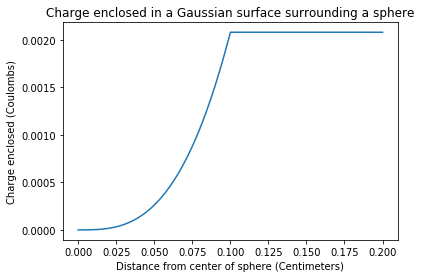

In [6]:
def rho(r):
    return 0.5*np.exp(-((r)**2))

def integrand1(phi):
    return 2*np.pi*np.sin(phi)

def integrand2(r):
    return quad(integrand1,0,np.pi)[0]*rho(r)*(r)**2

rValues=np.linspace(0, 0.2, 1000)
qValues=[]
for radius in rValues:
    if radius<=0.1:
        qValues.append(quad(integrand2,0,radius)[0])
    else:
        qValues.append(quad(integrand2,0,0.1)[0])
    
plt.plot(rValues, qValues)
plt.xlabel('Distance from center of sphere (Centimeters)')
plt.ylabel('Charge enclosed (Coulombs)')
plt.title('Charge enclosed in a Gaussian surface surrounding a sphere')
plt.show()